# Projet 7 : Implémentez un modèle de scoring : DummyClassifier

L'objectif de ce notebook est de tester un modèle baseline de Classification étant DummyClassifier.



## Importation des modules

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns

##Split
from sklearn.model_selection import train_test_split

## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer

## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Warning
import warnings

In [ ]:
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, loguniform, randint
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning

In [ ]:
warnings.filterwarnings("ignore")

##  Importation de données

In [ ]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Mounted at /content/drive


In [ ]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek.csv")

In [ ]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek.csv")

In [ ]:
X_test_smtomek

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,0.0,0.10,0.001972,-0.617463,-0.894585,148.064242,0.0,-1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,2.0,2.0,1.0,0.0,7.0,2.0
1,3.0,-0.15,-0.487703,-0.805703,0.650082,-0.627071,0.0,3.0,0.0,0.0,...,1.0,6.0,1.0,1.0,0.0,1.0,1.0,1.0,7.0,2.0
2,0.0,-0.80,-0.375940,-0.843008,-0.735019,148.064242,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,2.0,1.0,4.0,9.0,4.0
3,0.0,-0.40,-0.487886,-0.620464,0.581089,-0.234747,0.0,0.0,0.0,0.0,...,1.0,6.0,1.0,0.0,0.0,2.0,0.0,0.0,7.0,1.0
4,0.0,1.85,-0.543024,-0.672402,0.226361,-0.863838,5.0,0.0,1.0,1.0,...,0.0,6.0,1.0,0.0,0.0,1.0,1.0,2.0,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123000,1.0,0.25,0.100150,0.099855,0.289582,-2.322020,0.0,1.0,1.0,1.0,...,0.0,6.0,1.0,1.0,0.0,2.0,1.0,0.0,7.0,0.0
123001,0.0,0.35,0.441270,0.000000,-0.399120,-0.621414,0.0,0.0,0.0,0.0,...,0.0,6.0,1.0,1.0,0.0,1.0,1.0,0.0,7.0,2.0
123002,0.0,0.05,-0.494586,1.467010,-0.672210,0.255354,0.0,0.0,-1.0,-1.0,...,1.0,6.0,1.0,0.0,0.0,1.0,0.0,0.0,7.0,0.0
123003,0.0,1.15,-0.116959,0.013453,-0.425509,-4.441212,3.0,0.0,0.0,0.0,...,1.0,6.0,1.0,1.0,0.0,2.0,1.0,0.0,7.0,1.0


##  DummyClassifier

Les métriques de base sont :    

La [précision](https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel) est le nombre d'éléments étant de vrais positifs par rapport au total des éléments.

Le [recall](https://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel) est le nombre de vrais positifs par rapport au nombre total d'éléments positifs.

[L'accuracy](https://kobia.fr/classification-metrics-accuracy/) permet de décrire la performance du modèle sur les individus positifs et négatifs de façon symétrique. Elle mesure le taux de prédictions correctes sur l’ensemble des individus.

[L'AUC ROC](https://kobia.fr/classification-metrics-auc-roc/) :  Pour prendre en compte le compromis entre la sensitivity et la Specificity, on calcule une métrique qui résume la performance globale du modèle : l’AUC ROC, aussi noté AUROC.

Le terme AUC signifie  Area Under the Curve, aire sous la courbe en français. La métrique AUC ROC consiste donc à calculer l’aire sous la courbe ROC. Plus le score est proche de 1, plus notre modèle est performant.


In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
rnd_clf = DummyClassifier(strategy='uniform', random_state=42)
rnd_clf.fit(X_train_smtomek, y_train_smtomek)

DummyClassifier(random_state=42, strategy='uniform')

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [ ]:
print(f'Accuracy: {accuracy_score(y_train_smtomek, rnd_clf.predict(X_train_smtomek))}')
print(f'Precision: {precision_score(y_train_smtomek, rnd_clf.predict(X_train_smtomek))}')
print(f'Recall: {recall_score(y_train_smtomek, rnd_clf.predict(X_train_smtomek))}')

Accuracy: 0.500551044601848
Precision: 0.5055996003259247
Recall: 0.5013534952023165


In [ ]:
y_prob = rnd_clf.predict_proba(X_test_smtomek)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
rnd_clf.score(X_test_smtomek, y_pred)

0.4986626559895939

In [ ]:
from sklearn import metrics

In [ ]:
confusion_matrix=metrics.confusion_matrix(y_test_smtomek,y_pred)
confusion_matrix

array([[113125,      0],
       [  9880,      0]])

In [ ]:
auc_roc=metrics.roc_auc_score(y_test_smtomek,y_pred)
auc_roc

0.5

In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_smtomek, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.5

On en conclut ici que l'AUC Score étant de 0.5 notre modèle baseline est peu performant.

Text(0.5, 0, 'False Positive Rate')

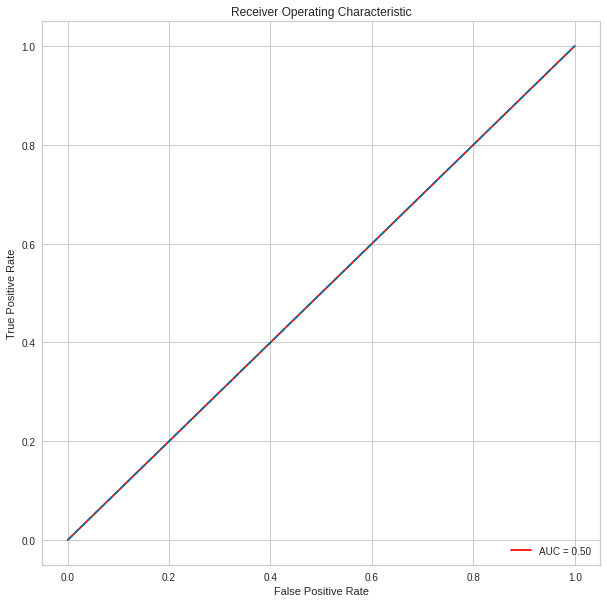

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')